In [1]:
import re
import numpy as np
import pandas as pd
import random as rd
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline

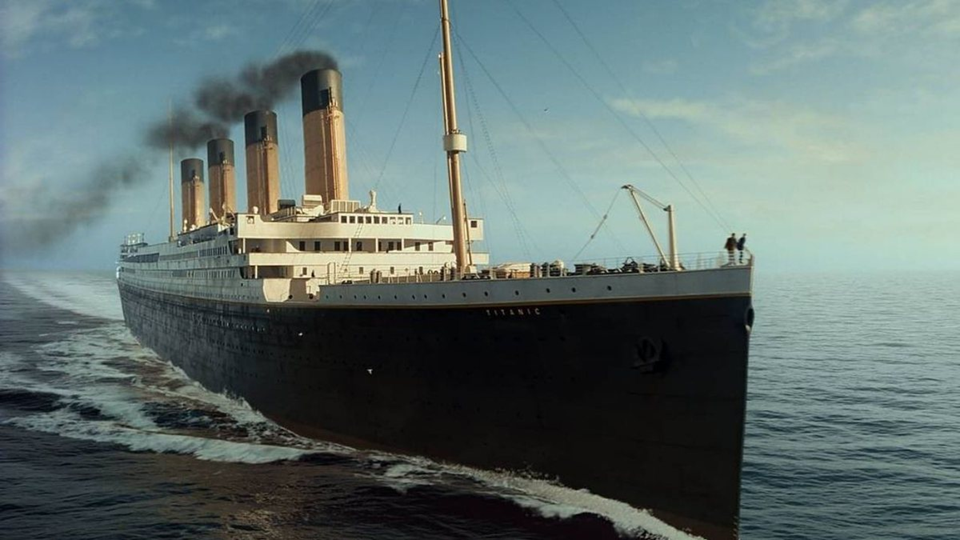

# 数据加载

In [2]:
data_train = pd.read_csv('titianic_train.csv',header=0)
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 数据探索

In [3]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
#import pandas_profiling as pp
#report = pp.ProfileReport(data_train)
#report

In [6]:
data_train['Age'].var()

211.01912474630802

In [7]:
pd.crosstab(data_train["Sex"],data_train["Survived"])

Survived,0,1
Sex,,
female,81,233
male,468,109


In [8]:
pd.crosstab(data_train["Pclass"],data_train["Survived"])

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [9]:
#将性别中的男女设置为0 1 值
print(data_train["Sex"].unique())

['male' 'female']


In [10]:
data_train.loc[data_train["Sex"] == "male","Sex"] = 0
data_train.loc[data_train["Sex"] == "female","Sex"] = 1

In [11]:
data_train["Sex"].describe()

count     891
unique      2
top         0
freq      577
Name: Sex, dtype: int64

<AxesSubplot:>

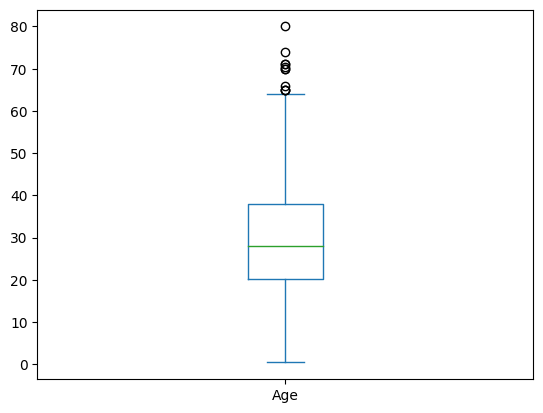

In [12]:
#可视化分析
data_train["Age"].plot.box()

<AxesSubplot:>

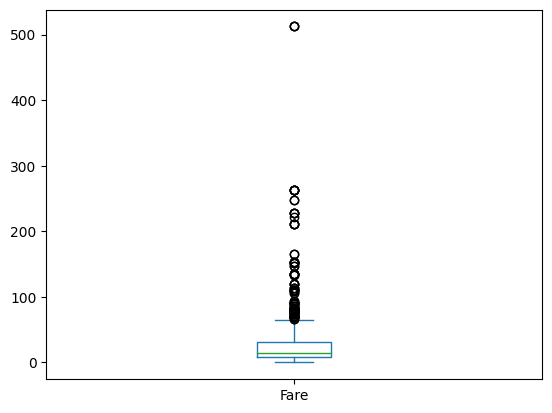

In [13]:
data_train["Fare"].plot.box()

<AxesSubplot:ylabel='Frequency'>

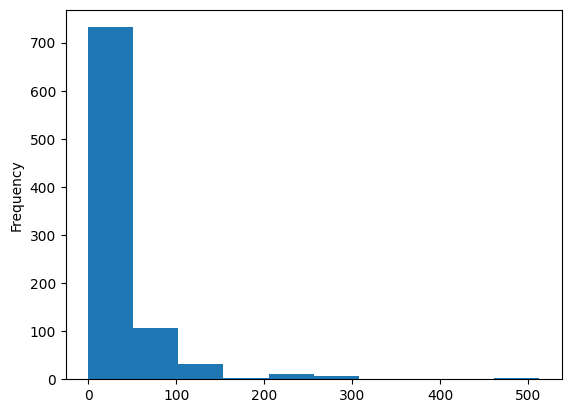

In [14]:
data_train["Fare"].plot(kind='hist')

<AxesSubplot:ylabel='Density'>

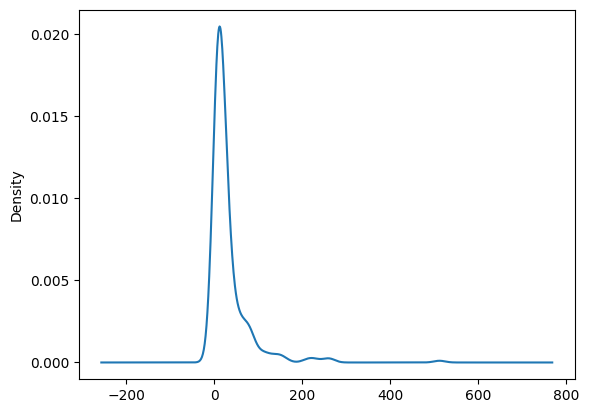

In [15]:
data_train["Fare"].plot(kind='kde')

<AxesSubplot:xlabel='Age', ylabel='Fare'>

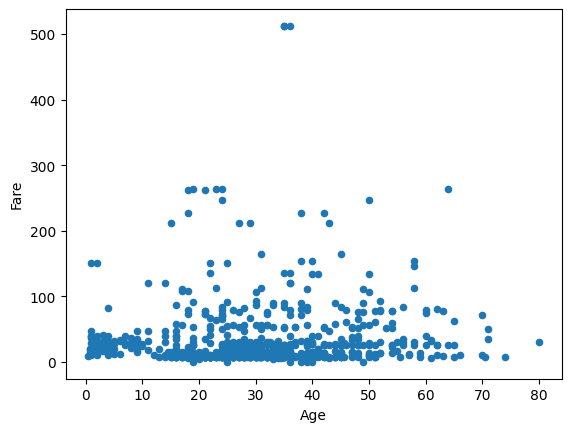

In [16]:
data_train.plot.scatter(x="Age",y="Fare")

In [17]:
#数据预处理， 填充缺失值以及将特征中含有字符的转换为数值型

#将年龄这一列的数据缺失值进行填充
data_train["Age"] = data_train["Age"].fillna(data_train["Age"].median())


In [18]:
data_train["Age"].describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

<AxesSubplot:ylabel='Density'>

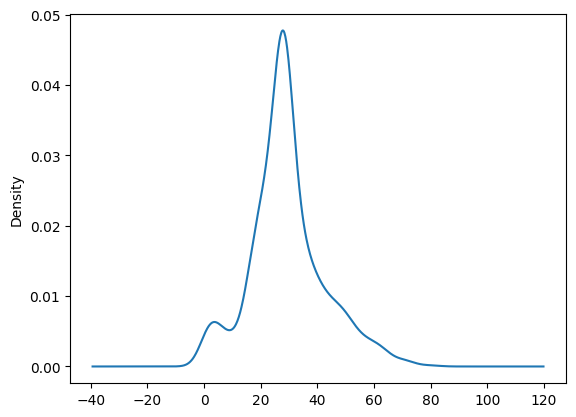

In [19]:
data_train["Age"].plot(kind='kde')

In [20]:
#通过统计三个登船地点人数最多的填充缺失值
print(data_train["Embarked"].unique())
data_train["Embarked"] = data_train["Embarked"].fillna("S")

#将登船地点同样转换成数值
data_train.loc[data_train["Embarked"] == "S","Embarked"] = 0
data_train.loc[data_train["Embarked"] == "C","Embarked"] = 1
data_train.loc[data_train["Embarked"] == "Q","Embarked"] = 2

print(data_train["Embarked"].unique())

['S' 'C' 'Q' nan]
[0 1 2]


In [21]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [22]:
#用决策树方法分类
from sklearn.ensemble import RandomForestClassifier  #随机森林
from sklearn.ensemble import AdaBoostClassifier
from sklearn import tree
from sklearn.model_selection import cross_val_score

In [23]:
predictors = ["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]
clf_tree=tree.DecisionTreeClassifier()
score = cross_val_score(clf_tree,data_train[predictors],data_train["Survived"],cv=3)
print(score.mean())

0.7542087542087543


In [24]:
#通过逻辑回归做分类
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
predictors = ["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]
alg = LogisticRegression(random_state = 1,max_iter=200)

#使用逻辑回归做交叉验证
score = cross_val_score(alg,data_train[predictors],data_train["Survived"],cv=3)

print(score.mean())

0.7946127946127947


In [25]:
#用K近邻分类
from sklearn import neighbors
K_neighbors=5
clf = neighbors.KNeighborsClassifier(K_neighbors, weights='uniform')
score = cross_val_score(clf,data_train[predictors],data_train["Survived"],cv=3)
print(score.mean())

0.7037037037037037


In [26]:
clf =AdaBoostClassifier(n_estimators=100)
score = cross_val_score(clf,data_train[predictors],data_train["Survived"],cv=3)
print(score.mean())

0.8024691358024691


In [27]:
clf =RandomForestClassifier(n_estimators=100)
score = cross_val_score(clf,data_train[predictors],data_train["Survived"],cv=3)
print(score.mean())

0.7946127946127947


feature importances= [0.08483508 0.26312639 0.25944284 0.04668675 0.03790294 0.27606258
 0.03194342]


ValueError: shape mismatch: objects cannot be broadcast to a single shape

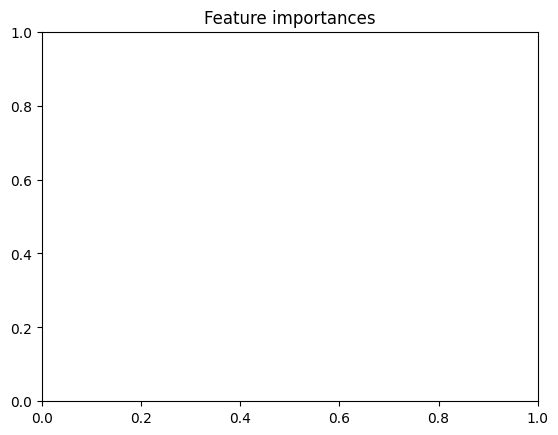

In [28]:
clf.fit(data_train[predictors],data_train["Survived"])
importances = clf.feature_importances_
print("feature importances=",importances)
std = np.std([clf.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
plt.figure()
plt.title("Feature importances")
plt.bar(range(10), importances[indices[:10]],alpha=0.4, bottom=0,color="r", yerr=std[indices[:10]], align="center")
plt.xticks(range(10), indices[:10])
plt.xlim([-1, 11])
plt.show()